In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beneificiary=pd.read_csv("Beneficiarydata.csv")
inpatient=pd.read_csv("Inpatientdata.csv")
outpatient=pd.read_csv("Outpatientdata.csv")
potentialfraud=pd.read_csv("PotentialFraud.csv")

In [3]:
beneificiary.shape

(138556, 25)

In [4]:
inpatient.shape

(40474, 30)

In [5]:
outpatient.shape

(517737, 27)

In [6]:
potentialfraud.shape

(5410, 2)

In [7]:
patient=outpatient.merge(inpatient,how='outer')

In [8]:
patient.shape

(558211, 30)

In [9]:
patient

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1        BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2        BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3        BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4        BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   
...            ...        ...          ...         ...       ...   
558206  BENE159167   CLM69886   2009-09-28  2009-10-02  PRV53671   
558207  BENE159175   CLM74504   2009-11-03  2009-11-06  PRV54981   
558208  BENE159177   CLM76485   2009-11-18  2009-11-22  PRV56588   
558209  BENE159177   CLM79949   2009-12-17  2009-12-18  PRV56575   
558210  BENE159188   CLM69948   2009-09-28  2009-10-06  PRV54765   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           30          PHY326117                NaN   
1                           80          PHY362868                NaN   
2                           10          PHY328821                NaN   
3                           40          PHY334319                NaN   
4                          200          PHY403831                NaN   
...                        ...                ...                ...   
558206                    7000          PHY345332          PHY319565   
558207                    4000          PHY342806          PHY365497   
558208                    3000          PHY423220          PHY332752   
558209                    5000          PHY353156                NaN   
558210                   15000          PHY431177          PHY352941   

       OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_2  \
0                 NaN              78943  ...                NaN   
1                 NaN               6115  ...                NaN   
2                 NaN               2723  ...                NaN   
3                 NaN              71988  ...                NaN   
4                 NaN              82382  ...                NaN   
...               ...                ...  ...                ...   
558206            NaN               2851  ...                NaN   
558207            NaN              42823  ...                NaN   
558208            NaN               4280  ...                NaN   
558209            NaN               7802  ...                NaN   
558210            NaN               1540  ...                NaN   

       ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
558206                NaN                NaN                NaN   
558207                NaN                NaN                NaN   
558208                NaN                NaN                NaN   
558209                NaN                NaN                NaN   
558210                NaN                NaN                NaN   

       ClmProcedureCode_6 DeductibleAmtPaid ClmAdmitDiagnosisCode AdmissionDt  \
0                     NaN               0.0                 56409         NaN   
1                     NaN               0.0                 79380         NaN   
2                     NaN               0.0                   NaN         NaN   
3                     NaN               0.0                   NaN         NaN   
4                     NaN               0.0                 71947         NaN   
...                   ...               ...                   ...         ...   
558206                NaN            1068.0                  2859  2009-09-28   
558207                NaN            1068.0                 

In [10]:
patient=patient.merge(potentialfraud,on='Provider')

In [11]:
patient.shape

(558211, 31)

In [12]:
patient=patient.merge(beneificiary,on='BeneID')

In [13]:
patient.shape

(558211, 55)

In [14]:
patient.sample(n=10)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
518822   BENE27677   CLM53115   2009-05-28  2009-06-01  PRV56748   
38187    BENE15325  CLM629502   2009-10-14  2009-10-14  PRV52149   
405815  BENE153758  CLM708713   2009-12-01  2009-12-01  PRV51984   
326898   BENE61210   CLM74392   2009-11-02  2009-11-09  PRV57018   
34385    BENE34878  CLM502890   2009-08-02  2009-08-02  PRV54761   
425523  BENE140478  CLM419688   2009-06-16  2009-06-23  PRV54328   
303574  BENE153606  CLM752192   2009-12-30  2009-12-30  PRV55689   
371028  BENE125608  CLM325302   2009-04-26  2009-04-26  PRV55281   
286074   BENE46875  CLM517106   2009-08-10  2009-08-10  PRV57335   
434080  BENE137997  CLM728071   2009-12-13  2009-12-13  PRV52074   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
518822                   41000          PHY325796          PHY383151   
38187                       40          PHY368519                NaN   
405815                      80          PHY368682                NaN   
326898                   28000          PHY358421          PHY398320   
34385                       60          PHY415031                NaN   
425523                    1400          PHY384953                NaN   
303574                     100          PHY419599                NaN   
371028                      30          PHY345071                NaN   
286074                      80          PHY321843                NaN   
434080                      40          PHY424703                NaN   

       OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_Depression  \
518822            NaN              99646  ...                      1   
38187       PHY380241              79677  ...                      2   
405815      PHY405263              53570  ...                      1   
326898            NaN               1625  ...                      2   
34385             NaN              29613  ...                      1   
425523            NaN               V538  ...                      1   
303574            NaN                NaN  ...                      2   
371028            NaN              71823  ...                      1   
286074      PHY321843               2829  ...                      1   
434080      PHY425857              79021  ...                      1   

       ChronicCond_Diabetes ChronicCond_IschemicHeart  \
518822                    2                         1   
38187                     1                         2   
405815                    1                         1   
326898                    1                         1   
34385                     1                         1   
425523                    2                         1   
303574                    1                         1   
371028                    1                         1   
286074                    1                         1   
434080                    1                         1   

       ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis  \
518822                        2                               2   
38187                         2                               2   
405815                        1                               2   
326898                        2                               2   
34385                         2                               1   
425523                        2                               2   
303574                        2                               2   
371028                        2                               1   
286074                        1                               2   
434080                        2                               1   

       ChronicCond_stroke IPAnnualReimbursementAmt IPAnnualDeductibleAmt  \
518822                  2                    41000                  1068   
38187                   2                        0                     0   
405815                  2                        0                     0   
326898 

In [15]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [16]:
patient["PotentialFraud"].replace(['Yes','No'],[1,0],inplace= True)

In [17]:
patient["RenalDiseaseIndicator"].replace(['Y','0'],[1,0],inplace= True)

In [18]:
patient=patient.fillna(0)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(patient)
plt.show()

/var/folders/0r/1c8gwn3x6196r4w8lbwn8vg00000gn/T/ipykernel_41053/2666538790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_0 = patient.corr()


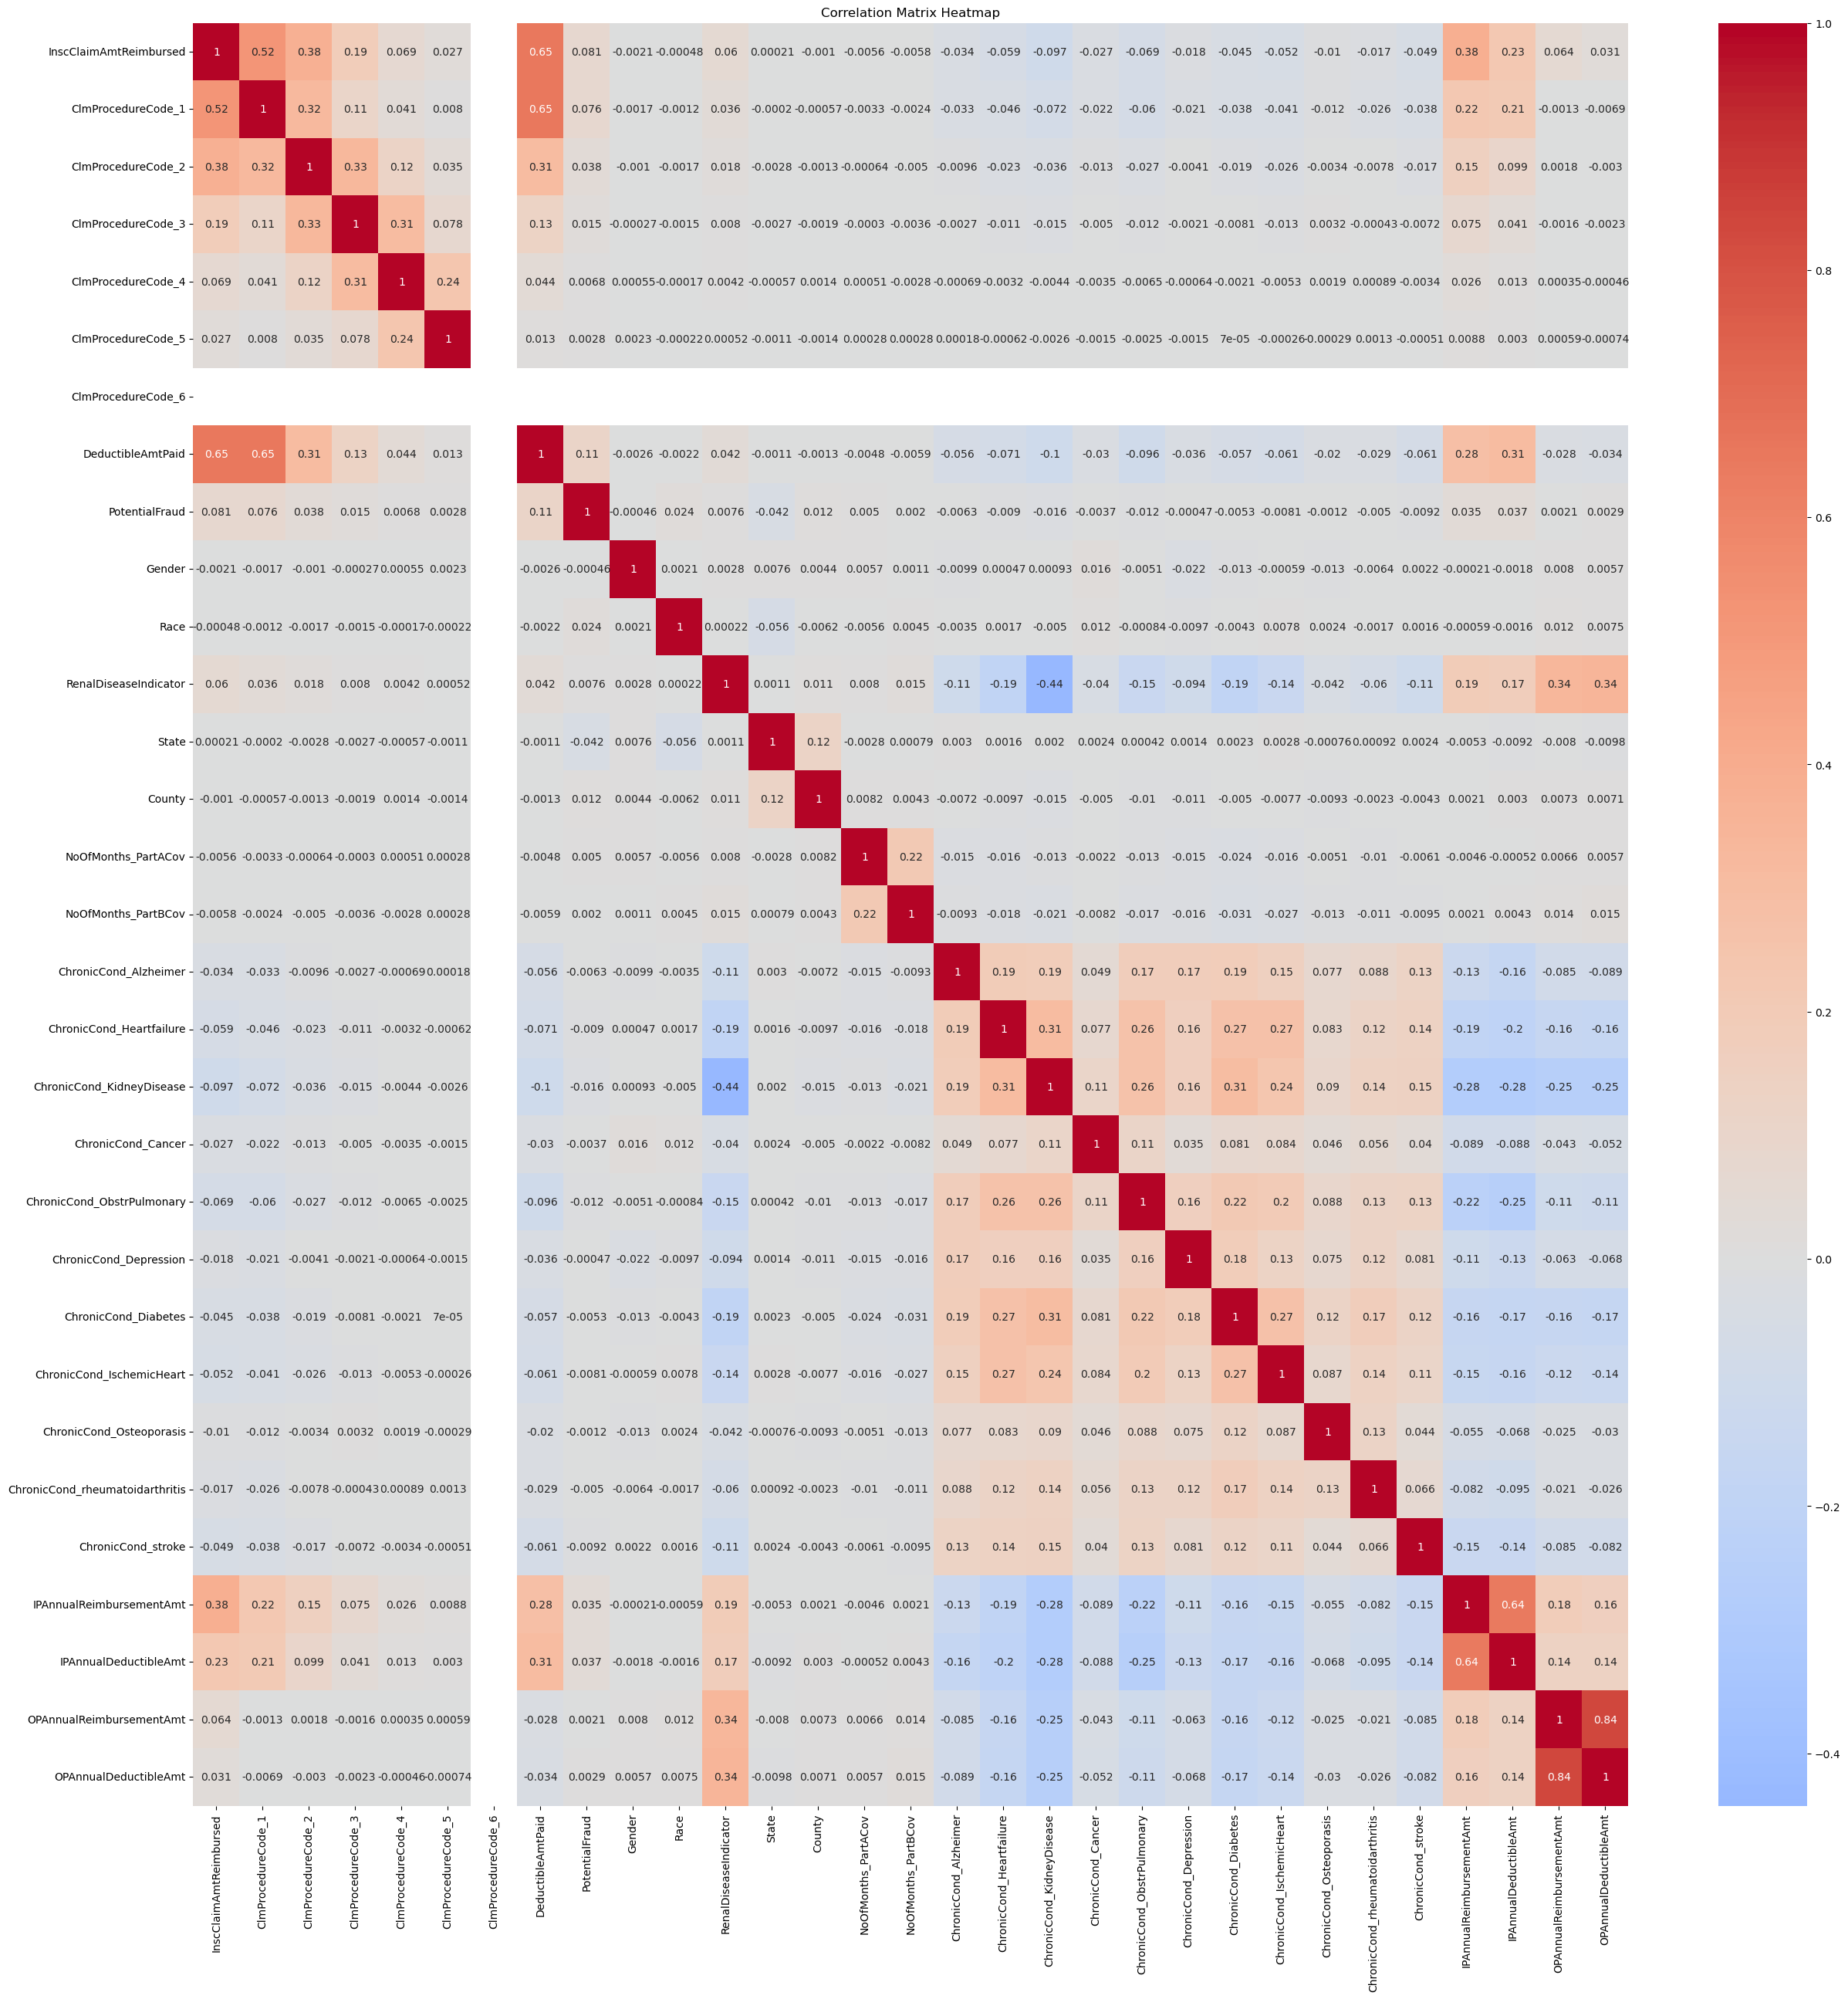

In [20]:
correlation_matrix_0 = patient.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix_0, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix_plot.pdf', format='pdf')

In [21]:
patient=patient.drop([ 'BeneID', 'DOB', 'DOD', 'Gender', 'Race','ClmAdmitDiagnosisCode', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
            'DischargeDt',   'Provider',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6',],axis=1)
patient

InscClaimAmtReimbursed  DeductibleAmtPaid  PotentialFraud  \
0                           30                0.0               1   
1                           40                0.0               1   
2                          200                0.0               1   
3                           20                0.0               1   
4                           40                0.0               1   
...                        ...                ...             ...   
558206                   48000             1068.0               0   
558207                    8000             1068.0               0   
558208                    7000             1068.0               0   
558209                    5000             1068.0               0   
558210                   14000             1068.0               0   

        RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0                           0     39     280                   12   
1                           0     39     270                   12   
2                           0     39     270                   12   
3                           0     39     270                   12   
4                           0     39     270                   12   
...                       ...    ...     ...                  ...   
558206                      0     42     390                   12   
558207                      0     14     680                   12   
558208                      0     36     360                   12   
558209                      0      3      60                   12   
558210                      0      5     200                   12   

        NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                        12                      2                         2   
1                        12                      1                         1   
2                        12                      1                         1   
3                        12                      1                         1   
4                        12                      1                         1   
...                     ...                    ...                       ...   
558206                   12                      1                         2   
558207                   12                      2                         1   
558208                   12                      1                         2   
558209                    0                      1                         1   
558210                   12                      1                         2   

        ...  ChronicCond_Depression  ChronicCond_Diabetes  \
0       ...                       2                     2   
1       ...                       2                     1   
2       ...                       2                     1   
3       ...                       2                     1   
4       ...                       2                     1   
...     ...                     ...                   ...   
558206  ...                       2                     1   
558207  ...                       2                     2   
558208  ...                       1                     1   
558209  ...                       2                     1   
558210  ...                       1                     1   

        ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                               2                         2   
1                               1                         1   
2                               1                         1   
3                               1                         1   
4                               1                         1   
...                           ...                       ...   
558206                          2                         2   
558207                          1                         2   
558208                          2                         2   
558209                    

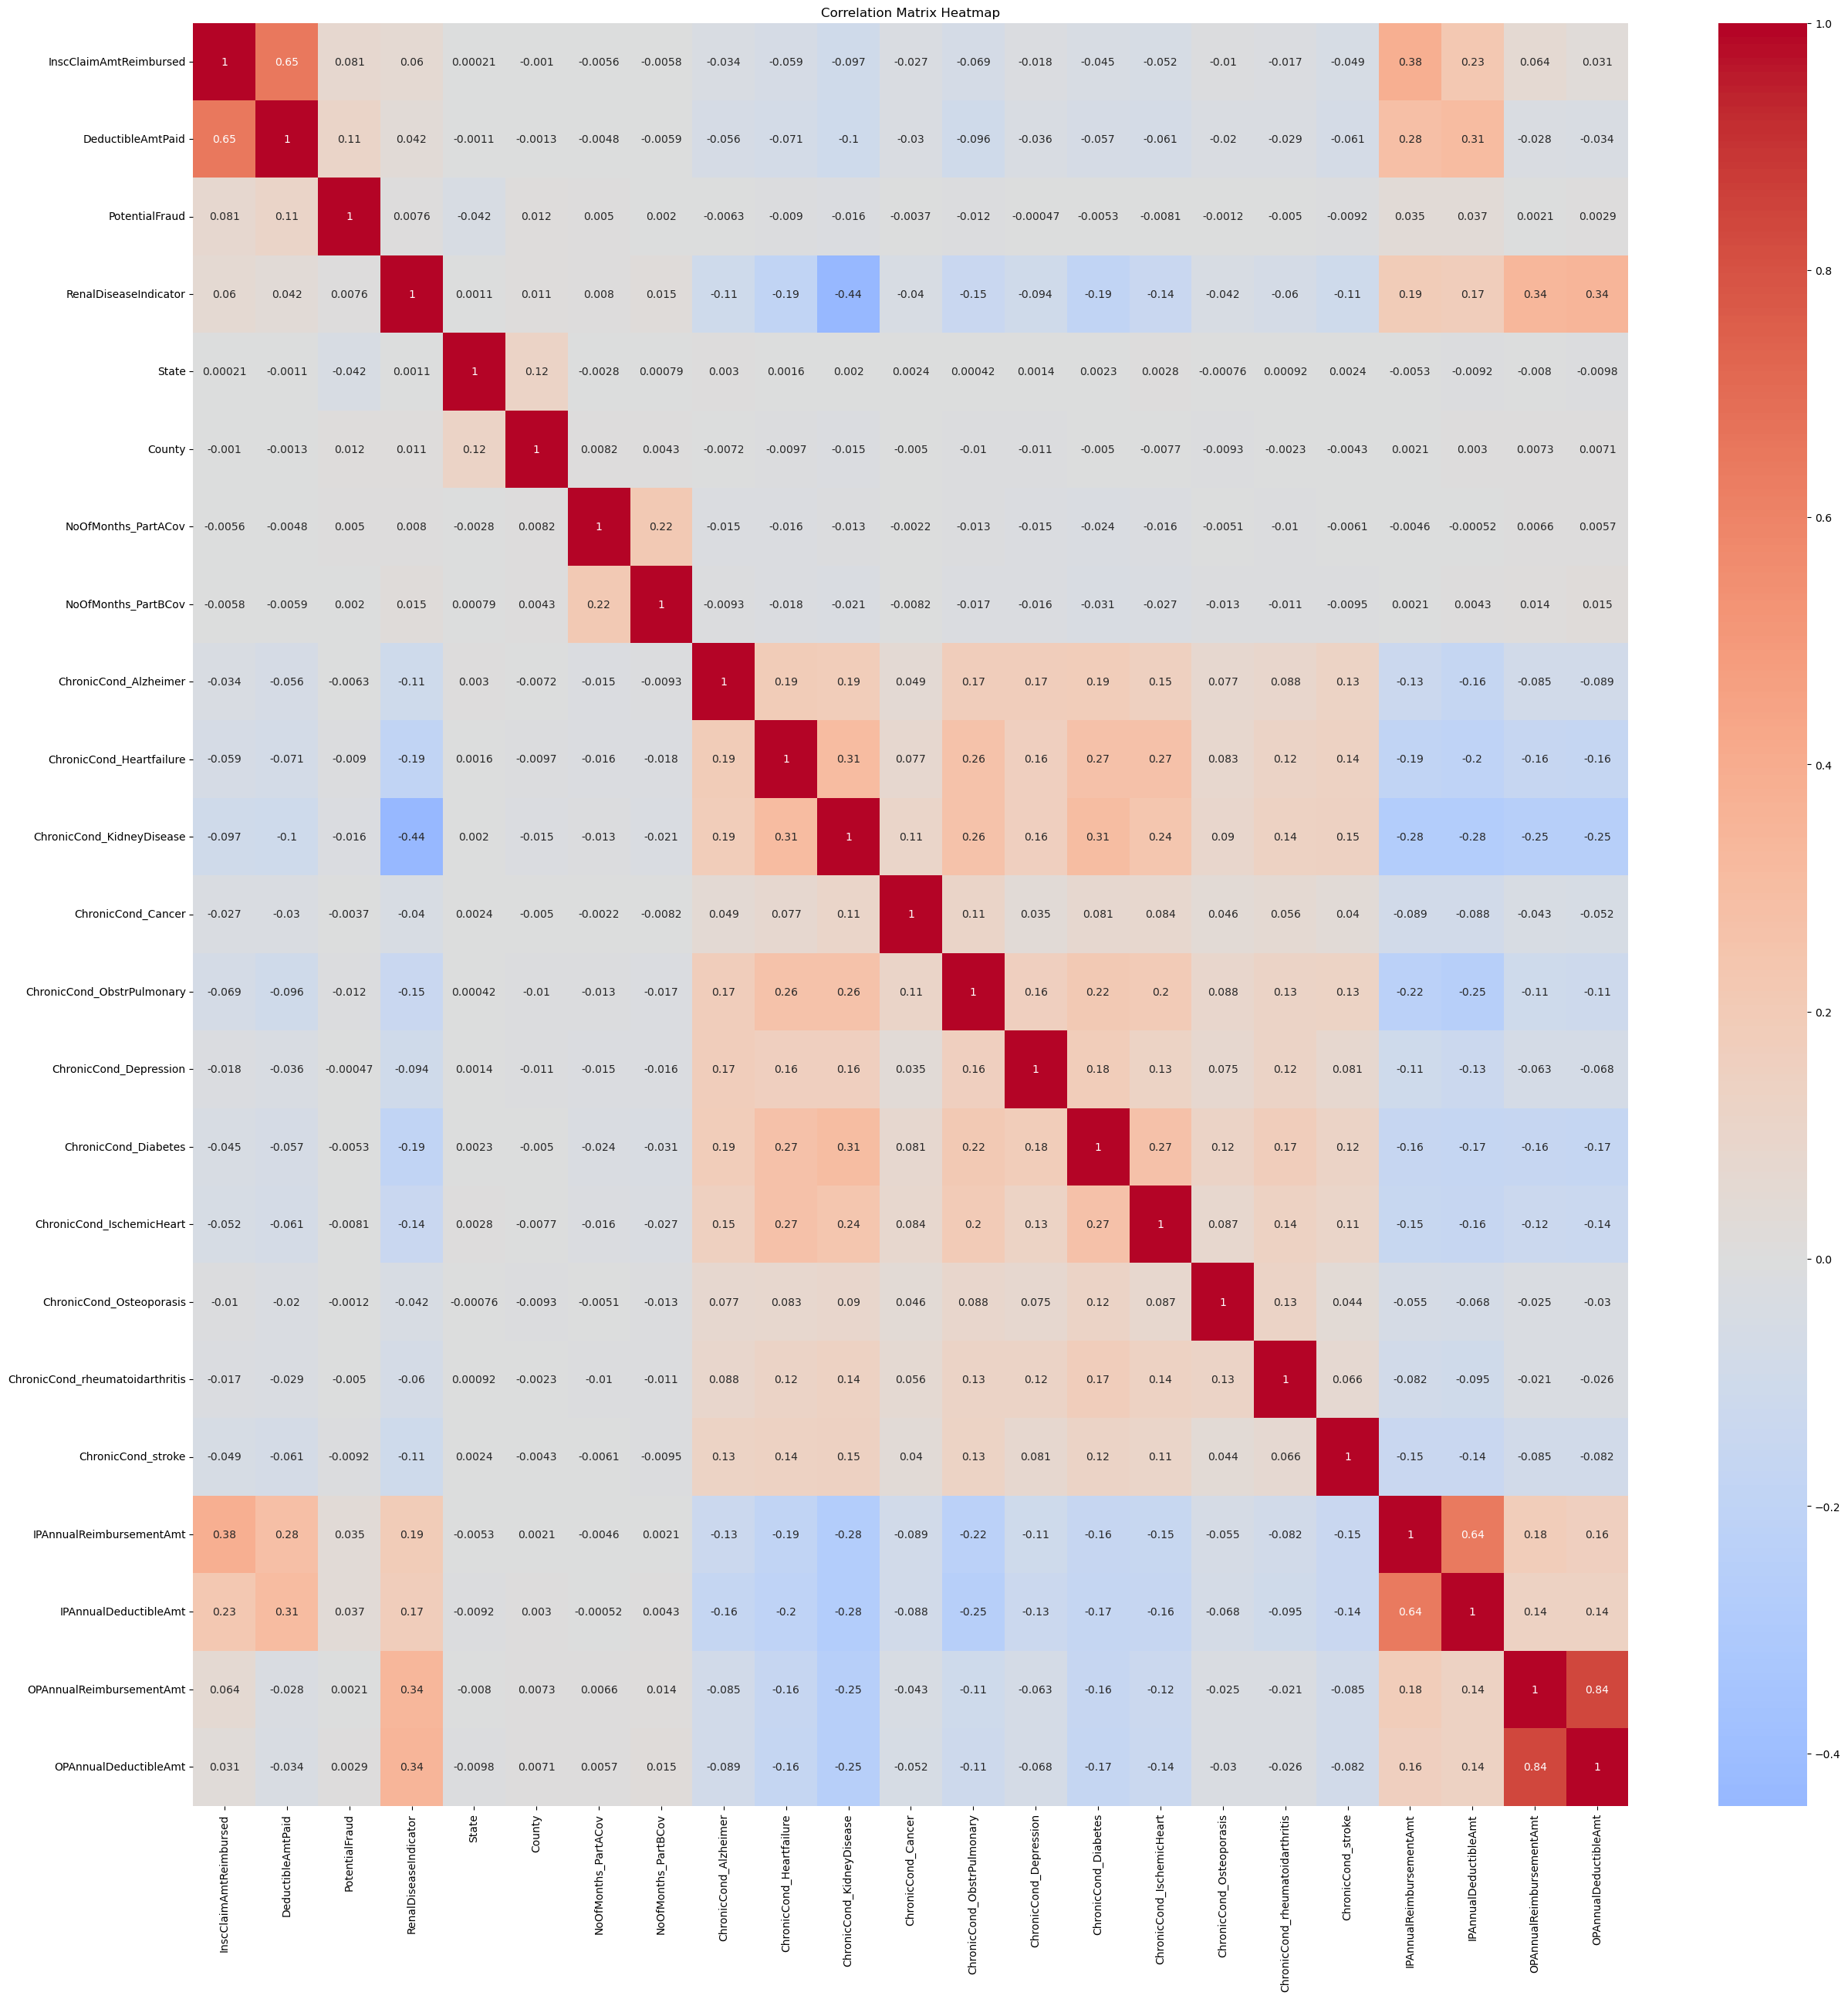

In [22]:
correlation_matrix_0 = patient.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix_0, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix_plot.pdf', format='pdf')

In [23]:
X=patient.drop(["PotentialFraud"],axis=1)
Y=patient["PotentialFraud"]

In [24]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

def feature_importance_dt(X, Y):
    model = DecisionTreeClassifier()
    model.fit(X, Y)

    # Get feature importances
    importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    return importances.sort_values(by='Importance', ascending=False)


feature_importances = feature_importance_dt(X, Y)
print(feature_importances)


                            Feature  Importance
4                            County    0.277111
0            InscClaimAmtReimbursed    0.239448
3                             State    0.121907
20         OPAnnualReimbursementAmt    0.088283
21            OPAnnualDeductibleAmt    0.078976
1                 DeductibleAmtPaid    0.028256
18         IPAnnualReimbursementAmt    0.026087
8          ChronicCond_Heartfailure    0.013051
12           ChronicCond_Depression    0.012652
16  ChronicCond_rheumatoidarthritis    0.012117
7             ChronicCond_Alzheimer    0.011999
13             ChronicCond_Diabetes    0.011891
15         ChronicCond_Osteoporasis    0.011771
14        ChronicCond_IschemicHeart    0.011086
9         ChronicCond_KidneyDisease    0.010824
19            IPAnnualDeductibleAmt    0.010508
11       ChronicCond_ObstrPulmonary    0.010467
10               ChronicCond_Cancer    0.007965
2             RenalDiseaseIndicator    0.007474
17               ChronicCond_stroke    0

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def feature_importance_rf(X, Y):
    model = RandomForestClassifier()
    model.fit(X, Y)

    # Get feature importances
    importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    return importances.sort_values(by='Importance', ascending=False)


feature_importances = feature_importance_rf(X, Y)
print(feature_importances)


                            Feature  Importance
0            InscClaimAmtReimbursed    0.274992
4                            County    0.149564
3                             State    0.125033
20         OPAnnualReimbursementAmt    0.119321
21            OPAnnualDeductibleAmt    0.110651
18         IPAnnualReimbursementAmt    0.035952
1                 DeductibleAmtPaid    0.022104
7             ChronicCond_Alzheimer    0.014888
15         ChronicCond_Osteoporasis    0.014498
8          ChronicCond_Heartfailure    0.014030
16  ChronicCond_rheumatoidarthritis    0.013731
12           ChronicCond_Depression    0.013689
19            IPAnnualDeductibleAmt    0.013606
13             ChronicCond_Diabetes    0.012491
11       ChronicCond_ObstrPulmonary    0.012096
14        ChronicCond_IschemicHeart    0.012074
10               ChronicCond_Cancer    0.010391
9         ChronicCond_KidneyDisease    0.010110
2             RenalDiseaseIndicator    0.009742
17               ChronicCond_stroke    0

In [26]:
X

InscClaimAmtReimbursed  DeductibleAmtPaid  RenalDiseaseIndicator  \
0                           30                0.0                      0   
1                           40                0.0                      0   
2                          200                0.0                      0   
3                           20                0.0                      0   
4                           40                0.0                      0   
...                        ...                ...                    ...   
558206                   48000             1068.0                      0   
558207                    8000             1068.0                      0   
558208                    7000             1068.0                      0   
558209                    5000             1068.0                      0   
558210                   14000             1068.0                      0   

        State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0          39     280                   12                   12   
1          39     270                   12                   12   
2          39     270                   12                   12   
3          39     270                   12                   12   
4          39     270                   12                   12   
...       ...     ...                  ...                  ...   
558206     42     390                   12                   12   
558207     14     680                   12                   12   
558208     36     360                   12                   12   
558209      3      60                   12                    0   
558210      5     200                   12                   12   

        ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                           2                         2   
1                           1                         1   
2                           1                         1   
3                           1                         1   
4                           1                         1   
...                       ...                       ...   
558206                      1                         2   
558207                      2                         1   
558208                      1                         2   
558209                      1                         1   
558210                      1                         2   

        ChronicCond_KidneyDisease  ...  ChronicCond_Depression  \
0                               2  ...                       2   
1                               2  ...                       2   
2                               2  ...                       2   
3                               2  ...                       2   
4                               2  ...                       2   
...                           ...  ...                     ...   
558206                          1  ...                       2   
558207                          2  ...                       2   
558208                          1  ...                       1   
558209                          2  ...                       2   
558210                          1  ...                       1   

        ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                          2                          2   
1                          1                          1   
2                          1                          1   
3                          1                          1   
4                          1                          1   
...                      ...                        ...   
558206                     1                          2   
558207                     2                          1   
558208                     1                          2   
558209                     1                          1   
558210                     1                          1   

        ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0         

In [27]:
X=X.drop(['ChronicCond_Alzheimer',    
   'ChronicCond_Osteoporasis'  ,
      'IPAnnualDeductibleAmt'   ,
  'ChronicCond_rheumatoidarthritis',
 'ChronicCond_Heartfailure'   ,
    'ChronicCond_Depression'  ,
'ChronicCond_Diabetes'   ,
 'ChronicCond_ObstrPulmonary',    
 'ChronicCond_IschemicHeart', 
  'ChronicCond_KidneyDisease',  
    'ChronicCond_Cancer',
     'RenalDiseaseIndicator',    
       'ChronicCond_stroke'  ,  
    'NoOfMonths_PartBCov'    ,
  'NoOfMonths_PartACov'   ],axis=1)

In [28]:
X

InscClaimAmtReimbursed  DeductibleAmtPaid  State  County  \
0                           30                0.0     39     280   
1                           40                0.0     39     270   
2                          200                0.0     39     270   
3                           20                0.0     39     270   
4                           40                0.0     39     270   
...                        ...                ...    ...     ...   
558206                   48000             1068.0     42     390   
558207                    8000             1068.0     14     680   
558208                    7000             1068.0     36     360   
558209                    5000             1068.0      3      60   
558210                   14000             1068.0      5     200   

        IPAnnualReimbursementAmt  OPAnnualReimbursementAmt  \
0                              0                        30   
1                              0                      1810   
2                              0                      1810   
3                              0                      1810   
4                              0                      1810   
...                          ...                       ...   
558206                     49040                         0   
558207                      8000                         0   
558208                      7600                         0   
558209                      5000                         0   
558210                     17120                         0   

        OPAnnualDeductibleAmt  
0                          50  
1                         760  
2                         760  
3                         760  
4                         760  
...                       ...  
558206                      0  
558207                      0  
558208                      0  
558209                      0  
558210                      0  

[558211 rows x 7 columns]

In [29]:
Y

0         1
1         1
2         1
3         1
4         1
         ..
558206    0
558207    0
558208    0
558209    0
558210    0
Name: PotentialFraud, Length: 558211, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [31]:
patient["RenalDiseaseIndicator"].nunique()

2

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X=sc.transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5, random_state=100)
X_train

array([[-0.25042634, -0.28594163,  1.61609968, ...,  4.70055886,
         0.47445883,  0.35957495],
       [-0.23472583, -0.28594163, -0.49016532, ..., -0.18903118,
        -0.20563051, -0.32903412],
       [-0.24519283, -0.28594163,  0.4971464 , ..., -0.44356476,
        -0.55597957, -0.04959856],
       ...,
       [-0.25827659, -0.28594163, -1.34583547, ..., -0.44356476,
         0.32762136, -0.13941713],
       [-0.24780959, -0.28594163, -1.01673157, ..., -0.21278765,
        -0.24427195, -0.42883254],
       [-0.26089335, -0.28594163, -1.34583547, ...,  4.05319513,
        -0.45293573, -0.51865111]])

In [34]:
#Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)
predicted_LR=LR.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score

In [37]:
acc_LR=accuracy_score(predicted_LR,Y_test)

In [38]:
acc_LR

0.6300401997807284

In [39]:
#K-Nearest Neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predicted_KNN=knn.predict(X_test)


In [41]:
acc_knn=accuracy_score(predicted_KNN,Y_test)
acc_knn

0.7038759467729107

In [42]:
#Linear Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [44]:
lda=LDA()
lda.fit(X_train,Y_train)
pred_lda=lda.predict(X_test)

In [45]:
acc_lda=accuracy_score(pred_lda,Y_test)
acc_lda

0.6300401997807284

In [46]:
#Quadratic Discriminant Analysis

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [48]:
qda=QDA().fit(X_train,Y_train)
pred_qda=qda.predict(X_test)

In [49]:
acc_qda=accuracy_score(Y_test,pred_qda)
acc_qda

0.6293092946765745

In [50]:
#Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
NB=GaussianNB().fit(X_train,Y_train)
pred_NB=NB.predict(X_test)

In [53]:
acc_NB=accuracy_score(pred_NB,Y_test)
acc_NB

0.6259055699268379

In [54]:
#Decision Tree

In [55]:
from sklearn import tree

In [56]:
DT=tree.DecisionTreeClassifier().fit(X_train,Y_train)
pred_DT=DT.predict(X_test)

In [57]:
acc_DT=accuracy_score(Y_test,pred_DT)
acc_DT

0.698290255315185

In [58]:
#Random FOrest

In [59]:
from sklearn.ensemble import RandomForestClassifier
# N=[1,3,5,7,9,11,15]
# D=[1,2,3,4,5,6,7,8,9]

In [60]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
prediction_rf = model.predict(X_test)


In [61]:
acc_rf=accuracy_score(prediction_rf,Y_test)
acc_rf

0.7361325087959413

In [62]:
from sklearn import svm
svm_classifier=svm.SVC()
svm_classifier.fit(X_train,Y_train)
predicted_svm=svm_classifier.predict(X_test)

In [63]:
acc_svm=accuracy_score(predicted_svm,Y_test)

In [64]:
acc_svm

0.6303841551238597

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [67]:
rf_classifier = RandomForestClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters
best_rf_classifier = grid_search.best_estimator_
accuracy = best_rf_classifier.score(X_test, Y_test)
print("Accuracy with Best Parameters:", accuracy)

/Users/sarveshkrishnan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sarveshkrishnan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sarveshkrishnan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/sarveshkrishnan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    val

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy with Best Parameters: 0.7614168093842483
